<h1>Learning Portfolio Artifact 3</h1>

Google OR Tools is a powerful library for solving various combinatorial optimization problems in Python. It provides a wide range of algorithms and tools for solving problems such as routing, scheduling, packing, and more. Here's a brief overview of how to use Google OR Tools for a common optimization problem:

Documentation: https://developers.google.com/optimization/introduction

<h3>1. Installation</h3>

First, we need to install Google OR Tools. You can install it via pip:

In [1]:
%pip install ortools
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<h3>2. Importing Modules</h3>

Depending on the type of problem we want to solve, we'll need to import specific modules. For example:

In [2]:
from ortools.linear_solver import pywraplp # For linear programming problems
from ortools.constraint_solver import routing_enums_pb2 # For routing problems
from ortools.constraint_solver import pywrapcp # For constraint programming problems


<h3>3. Usage</h3>

Once we have imported the required modules, we can define your problem and constraints and then solve it using appropriate methods. Let's try to use Google OR tools to solve a Travelling Salesman Problem(TSP).

In TSP, suppose we have a set of locations (cities) that a salesman needs to visit exactly once, starting and ending at the same location (usually called the depot), while minimizing the total distance traveled

In [3]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp # For constraint programming problems
import random

We start by creating a data model to represent the problem. In this example, we randomly generate a distance matrix that contains the distances between all pairs of locations. We also define the number of vehicles (in this case, only one salesman) and specify the depot (starting and ending point).

With Google OR Tools, we create a routing model to represent our TSP problem. This model helps us find the best route for the salesman. We use components like RoutingIndexManager to manage city indices and RoutingModel to define the problem.

Constraints:

- Each location must be visited exactly once.
- The salesman starts and ends at the depot (location 0).
- There is only one vehicle available.

Objective Function:
The objective function is to minimize the total distance traveled by the salesman while visiting all locations exactly once and returning to the depot.



In [4]:
def create_data_model(num_locations):
    data = {}
    data['distance_matrix'] = [
        [random.randint(1, 100) for _ in range(num_locations)] for _ in range(num_locations)
    ]
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


We define a function called a "distance callback" that calculates the distance between any two cities. This function is essential for evaluating the cost (or distance) of traveling between cities in our TSP.

In [5]:
def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

We specify search parameters that guide how the routing model explores possible solutions. In this example, we use a strategy called PATH_CHEAPEST_ARC, which focuses on finding the initial solution efficiently
To better understand this strategy:- Starting from a route "start" node, connect it to the node which produces the cheapest route segment, then extend the route by iterating on the last node added to the route.

We can also use other strategies from the documentation https://developers.google.com/optimization/routing/routing_options

Using the defined routing model and search parameters, we solve the TSP problem. Google OR Tools employs algorithms to find the optimal route for the salesman based on the defined criteria (minimizing total distance).

In [6]:
def solve_tsp(num_locations):
    data = create_data_model(num_locations)
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print_solution(manager, routing, solution)

Finally, if a solution is found, we print the optimal route for the salesman. This includes the sequence of cities to visit and the total distance traveled. It gives us insight into how the salesman should navigate the cities to minimize travel distance.

In [7]:
def print_solution(manager, routing, solution):
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {} miles\n'.format(route_distance)


In this example provided, we generate a TSP problem with 200 cities (locations) and solve it. We can adjust the num_locations variable to create TSP problems with different numbers of cities

In [8]:
num_locations = 200
solve_tsp(num_locations)

Objective: 0 miles
Route for vehicle 0:
 0 -> 199 -> 198 -> 197 -> 196 -> 195 -> 194 -> 193 -> 192 -> 191 -> 190 -> 189 -> 188 -> 187 -> 186 -> 185 -> 184 -> 183 -> 182 -> 181 -> 180 -> 179 -> 178 -> 177 -> 176 -> 175 -> 174 -> 173 -> 172 -> 171 -> 170 -> 169 -> 168 -> 167 -> 166 -> 165 -> 164 -> 163 -> 162 -> 161 -> 160 -> 159 -> 158 -> 157 -> 156 -> 155 -> 154 -> 153 -> 152 -> 151 -> 150 -> 149 -> 148 -> 147 -> 146 -> 145 -> 144 -> 143 -> 142 -> 141 -> 140 -> 139 -> 138 -> 137 -> 136 -> 135 -> 134 -> 133 -> 132 -> 131 -> 130 -> 129 -> 128 -> 127 -> 126 -> 125 -> 124 -> 123 -> 122 -> 121 -> 120 -> 119 -> 118 -> 117 -> 116 -> 115 -> 114 -> 113 -> 112 -> 111 -> 110 -> 109 -> 108 -> 107 -> 106 -> 105 -> 104 -> 103 -> 102 -> 101 -> 100 -> 99 -> 98 -> 97 -> 96 -> 95 -> 94 -> 93 -> 92 -> 91 -> 90 -> 89 -> 88 -> 87 -> 86 -> 85 -> 84 -> 83 -> 82 -> 81 -> 80 -> 79 -> 78 -> 77 -> 76 -> 75 -> 74 -> 73 -> 72 -> 71 -> 70 -> 69 -> 68 -> 67 -> 66 -> 65 -> 64 -> 63 -> 62 -> 61 -> 60 -> 59 -> 58 -> 57

Objective: 0 miles
Route for vehicle 0:
 0 -> 199 -> 198 -> 197 -> 196 -> 195 -> 194 -> 193 -> 192 -> 191 -> 190 -> 189 -> 188 -> 187 -> 186 -> 185 -> 184 -> 183 -> 182 -> 181 -> 180 -> 179 -> 178 -> 177 -> 176 -> 175 -> 174 -> 173 -> 172 -> 171 -> 170 -> 169 -> 168 -> 167 -> 166 -> 165 -> 164 -> 163 -> 162 -> 161 -> 160 -> 159 -> 158 -> 157 -> 156 -> 155 -> 154 -> 153 -> 152 -> 151 -> 150 -> 149 -> 148 -> 147 -> 146 -> 145 -> 144 -> 143 -> 142 -> 141 -> 140 -> 139 -> 138 -> 137 -> 136 -> 135 -> 134 -> 133 -> 132 -> 131 -> 130 -> 129 -> 128 -> 127 -> 126 -> 125 -> 124 -> 123 -> 122 -> 121 -> 120 -> 119 -> 118 -> 117 -> 116 -> 115 -> 114 -> 113 -> 112 -> 111 -> 110 -> 109 -> 108 -> 107 -> 106 -> 105 -> 104 -> 103 -> 102 -> 101 -> 100 -> 99 -> 98 -> 97 -> 96 -> 95 -> 94 -> 93 -> 92 -> 91 -> 90 -> 89 -> 88 -> 87 -> 86 -> 85 -> 84 -> 83 -> 82 -> 81 -> 80 -> 79 -> 78 -> 77 -> 76 -> 75 -> 74 -> 73 -> 72 -> 71 -> 70 -> 69 -> 68 -> 67 -> 66 -> 65 -> 64 -> 63 -> 62 -> 61 -> 60 -> 59 -> 58 -> 57

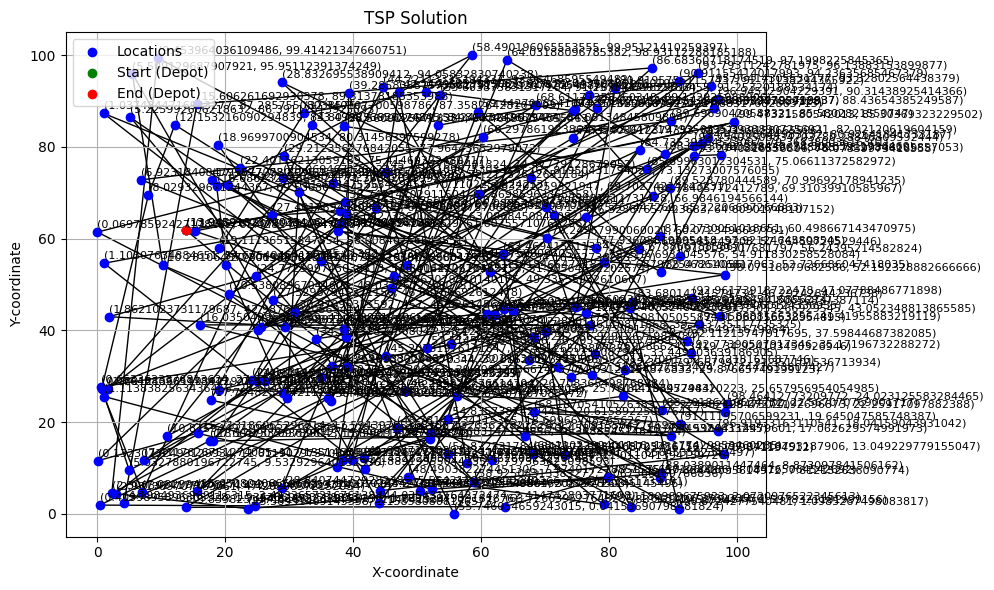

In [9]:
import matplotlib.pyplot as plt
import random

def create_data_model(num_locations):
    data = {}
    data['distance_matrix'] = [
        [random.randint(1, 100) for _ in range(num_locations)] for _ in range(num_locations)
    ]
    data['num_vehicles'] = 1
    data['depot'] = 0
    data['coordinates'] = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_locations)]
    return data

def plot_solution(manager, routing, solution, data):
    locations = []
    index = routing.Start(0)
    while not routing.IsEnd(index):
        locations.append(data['coordinates'][manager.IndexToNode(index)])
        index = solution.Value(routing.NextVar(index))
    locations.append(data['coordinates'][manager.IndexToNode(index)])  # Adding the depot to the end

    plt.figure(figsize=(10, 6))
    plt.scatter([x[0] for x in locations], [x[1] for x in locations], color='blue', label='Locations', zorder=2)  # Plotting locations
    plt.scatter(locations[0][0], locations[0][1], color='green', label='Start (Depot)', zorder=3)  # Start point
    plt.scatter(locations[-1][0], locations[-1][1], color='red', label='End (Depot)', zorder=3)  # End point
    for i, txt in enumerate(locations):
        plt.annotate(txt, (locations[i][0], locations[i][1] + 1), fontsize=8)  # Adding labels to locations

    # Plotting the route
    for i in range(len(locations) - 1):
        plt.plot([locations[i][0], locations[i + 1][0]], [locations[i][1], locations[i + 1][1]], 'k-', linewidth=1, zorder=1)

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('TSP Solution')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Modify the solve_tsp function to return data
def solve_tsp(num_locations):
    data = create_data_model(num_locations)
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)
    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print_solution(manager, routing, solution)
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {} miles\n'.format(route_distance)
    return manager, routing, solution, data

num_locations = 200
manager, routing, solution, data = solve_tsp(num_locations)
plot_solution(manager, routing, solution, data)


In conclusion, the Traveling Salesman Problem (TSP) is a classic problem in combinatorial optimization where a salesman needs to visit a set of cities exactly once and return to the starting city while minimizing the total distance traveled. Using Google OR Tools, we can efficiently solve TSP and similar optimization problems.

By following a systematic approach outlined in this solution:

- We define the problem data, including the set of cities and distances between them.
- We create a routing model with Google OR Tools, specifying the problem constraints and objectives.
- We set up the necessary callbacks and parameters to guide the search for the optimal solution.
- We solve the TSP problem, leveraging algorithms provided by Google OR Tools to find the best route.
- Finally, we interpret and print the solution, providing insights into the optimal sequence of city visits and the total distance traveled.


With these steps, anyone can use Google OR Tools to tackle TSP and other combinatorial optimization problems effectively, opening doors to solutions for various real-world challenges.